In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict, cross_val_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import ttest_rel

%matplotlib inline

In [83]:
df = pd.read_csv("Breast_cancer_dataset.csv")

In [84]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Exploratory Data Analysis (full steps are in HW1)

In [85]:
df = df.drop('Unnamed: 32',axis=1)
df = df.drop('id',axis=1)

In [86]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
Y = df['diagnosis']
X = df.drop('diagnosis', axis=1)
df.head() # 1 => M (Malignant) ; 0 => B (Benign)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
cols_to_drop = ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'perimeter_worst', 'area_worst', "concave points_mean"]
X = X.drop(columns=cols_to_drop)
cols_to_keep = [col for col in X.columns if col.endswith('_mean')]
X = X[cols_to_keep]


In [88]:
X.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

## TASK 1

### Decision Tree Classifier

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X.columns], 
    Y,
    test_size=0.2,
    random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [90]:
X_train.shape

(455, 7)

In [91]:
X_test.shape

(114, 7)

In [92]:
# 1. Train 3 Models with different settings
# Model A: No limits
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train, y_train)

# Model B: Restricted Depth
tree_restrict_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_restrict_depth.fit(X_train, y_train)

# Model C: Restricted Leaves
tree_restrict_leaves = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
tree_restrict_leaves.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curren

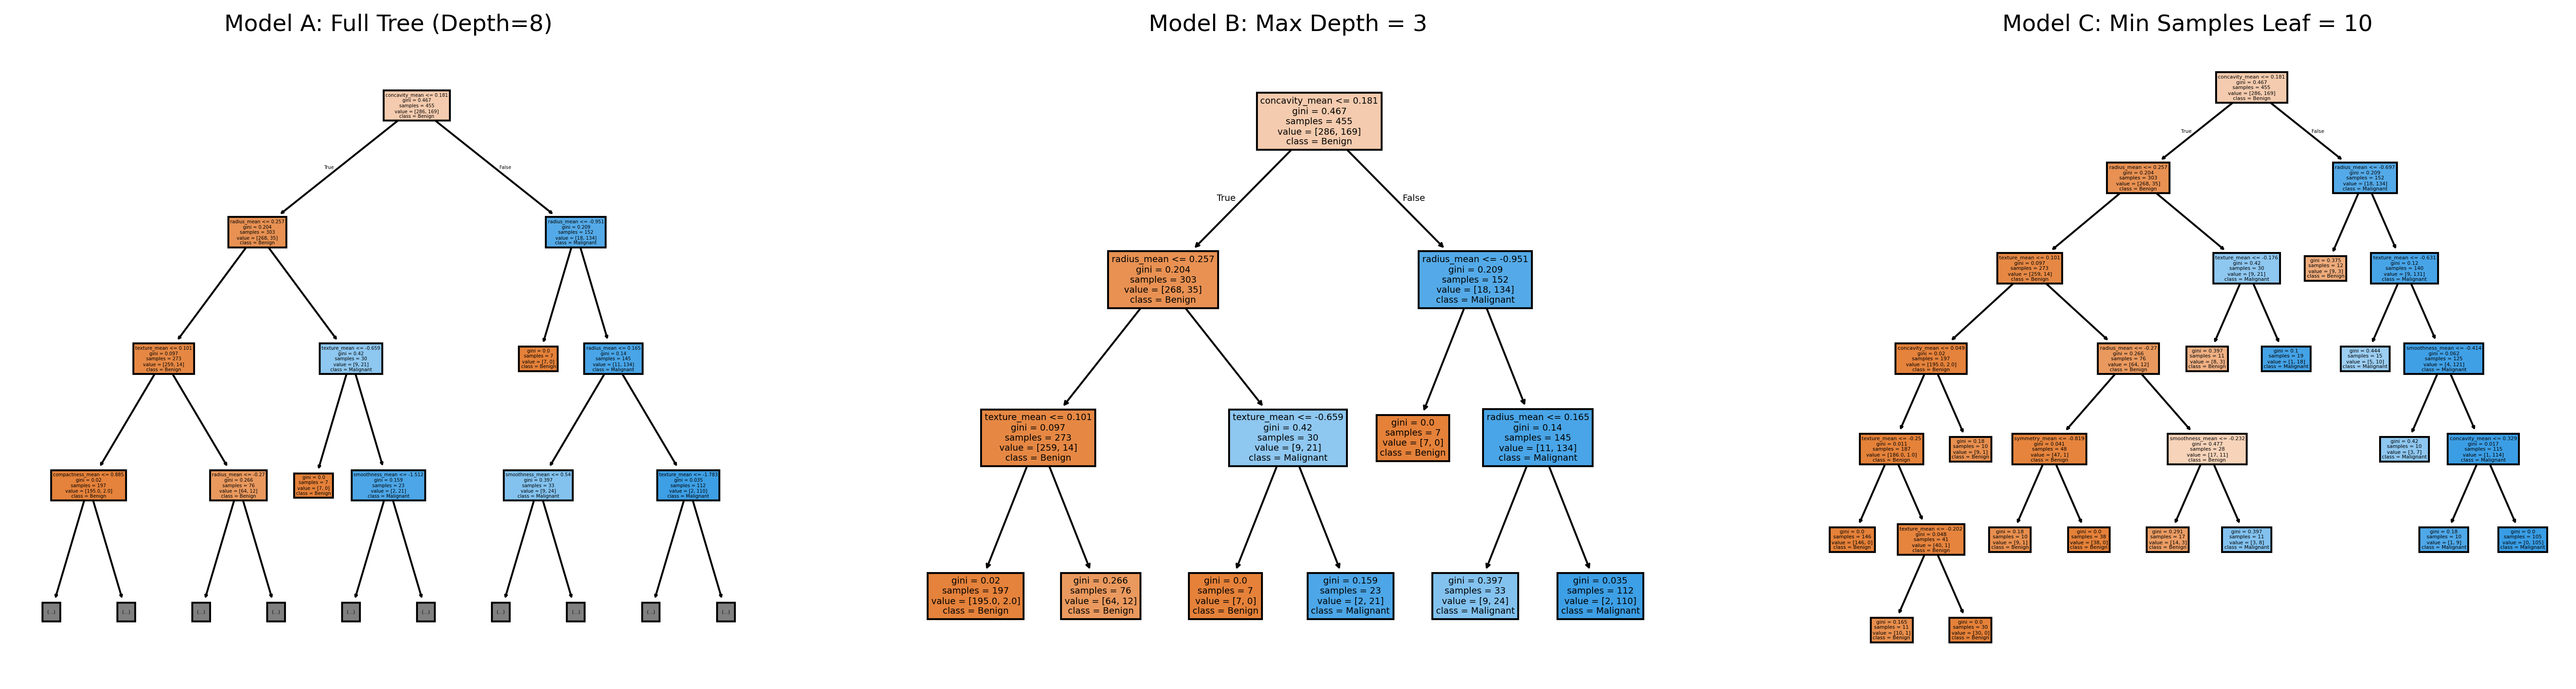

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6), dpi=300)
# Plot Model A
plot_tree(tree_full, feature_names=X.columns, class_names=['Benign', 'Malignant'], 
          filled=True, ax=axes[0], max_depth=3) # Showing only top 3 layers for visibility
axes[0].set_title(f"Model A: Full Tree (Depth={tree_full.get_depth()})")

# Plot Model B
plot_tree(tree_restrict_depth, feature_names=X.columns, class_names=['Benign', 'Malignant'], 
          filled=True, ax=axes[1])
axes[1].set_title(f"Model B: Max Depth = 3")

# Plot Model C
plot_tree(tree_restrict_leaves, feature_names=X.columns, class_names=['Benign', 'Malignant'], 
          filled=True, ax=axes[2])
axes[2].set_title(f"Model C: Min Samples Leaf = 10")

plt.show()

#### Analysis: Impact of Depth and Complexity

* **Model A (Full Tree):** The tree grows very deep to classify every single training point. The model becomes very complex and is prone to overfitting.
* **Model B (Max Depth=3):** This tree is much simpler. The model focuses only on the most dominant features. It generalizes better but is prone to underfitting.
* **Model C (Min Samples Leaf=10):** This setting forces the tree to make decisions based on multiple observations and not outliers. This model is less sensitive to noise.



#### Sensitivity Analysis 

This analysis measures how much the model's prediction changes when we vary a specific input feature while keeping others constant.

Source: https://rpubs.com/Yury/SA


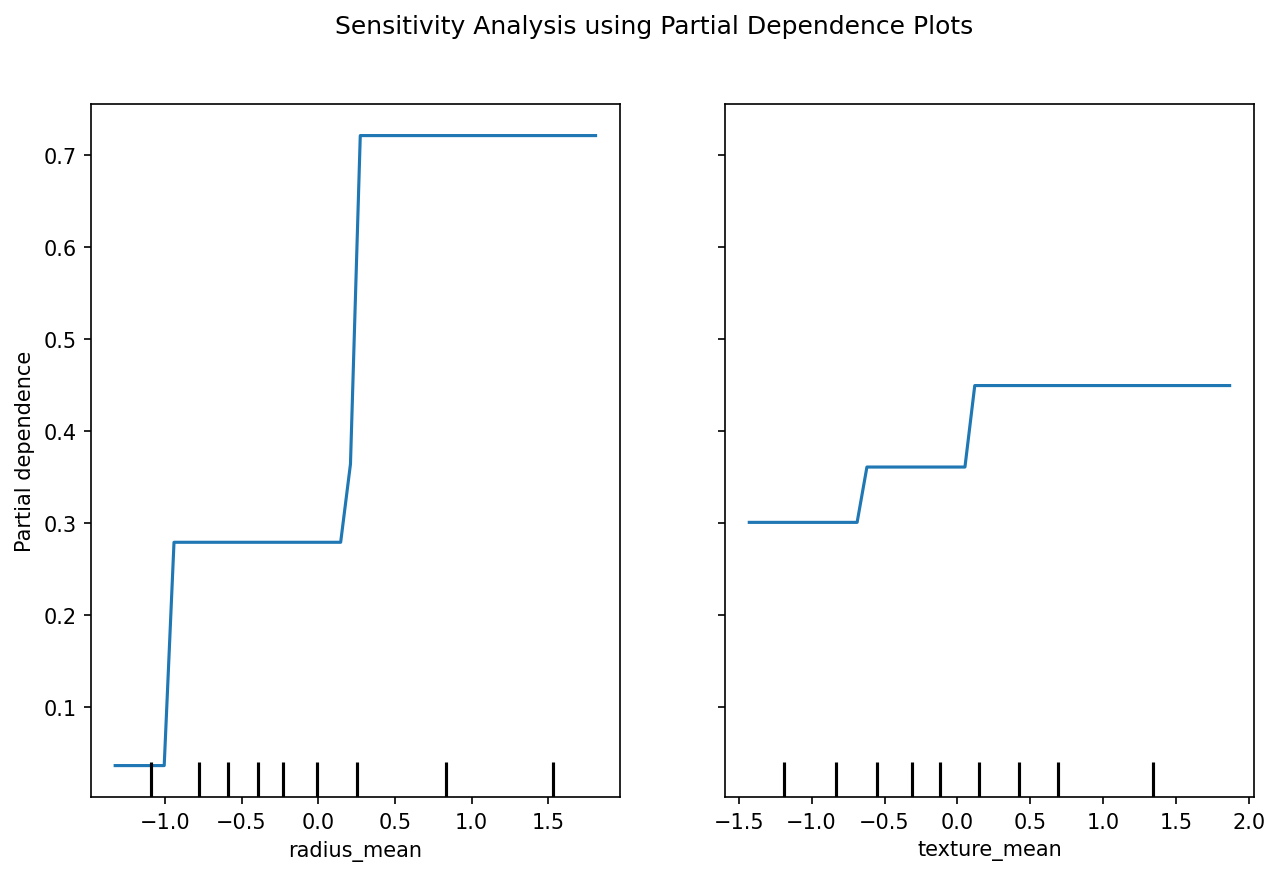

In [94]:
features_for_sensitivity = [
    'radius_mean',
    'texture_mean'
]
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

PartialDependenceDisplay.from_estimator(
    tree_restrict_depth,
    X_train,
    features=features_for_sensitivity,
    feature_names=X.columns,
    grid_resolution=50,
    ax=ax
)

plt.suptitle("Sensitivity Analysis using Partial Dependence Plots")
plt.show()


### Sensitivity Analysis Results

The partial dependence plot for **radius_mean** indicates that the model is highly sensitive to changes in the tumor radius (the bigger the radius, the more likely the malignancy).

The plot for **texture_mean** shows that this feature still contributes to the decision boundary, but is less influential than the radius mean.

## TASK 2

In [95]:
# Bagging (Random Forest) and Boosting (Gradient Boosting)
random_forest = RandomForestClassifier(random_state=42)

# Boosting: Gradient Boosting
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [96]:
# Test 3 different fold
k_folds = [5, 10, 15]
evaluation_metrics = ["precision", "recall", "f1"]
results = []
models = {
    "Random Forest": random_forest,
    "Gradient Boosting": gradient_boosting
}
for k in k_folds:
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    
    for name, model in models.items():
        # perform_cross_validation
        cv_results = cross_validate(model, X, Y, cv=skf, scoring=evaluation_metrics)
        results.append({
            "K-Folds": k,
            "Algorithm": name,
            "Avg Precision": np.mean(cv_results['test_precision']),
            "Avg Recall": np.mean(cv_results['test_recall']),
            "Avg F1": np.mean(cv_results['test_f1'])
        })
results = pd.DataFrame(results)
results = results.sort_values(by=['K-Folds', 'Avg F1'], ascending=[True, False])

In [97]:
results

,K-Folds,Algorithm,Avg Precision,Avg Recall,Avg F1
0,5,Random Forest,0.946879,0.900997,0.920153
1,5,Gradient Boosting,0.937401,0.896456,0.913611
2,10,Random Forest,0.955238,0.900216,0.922883
3,10,Gradient Boosting,0.929609,0.891558,0.905599
4,15,Random Forest,0.953613,0.905079,0.923264
5,15,Gradient Boosting,0.933576,0.900952,0.910160


#### Performance Comparison

Across all fold settings, Random Forest outperforms Gradient Boosting in all of the evaluation metrics. 

Since Random Forest averages many trees, it naturally reduces variance, which is more effective for decision tree learners. In contrast, Gradient Boosting focuses on sequentially correcting errors, which is more sensitive to noise.

## Task 3

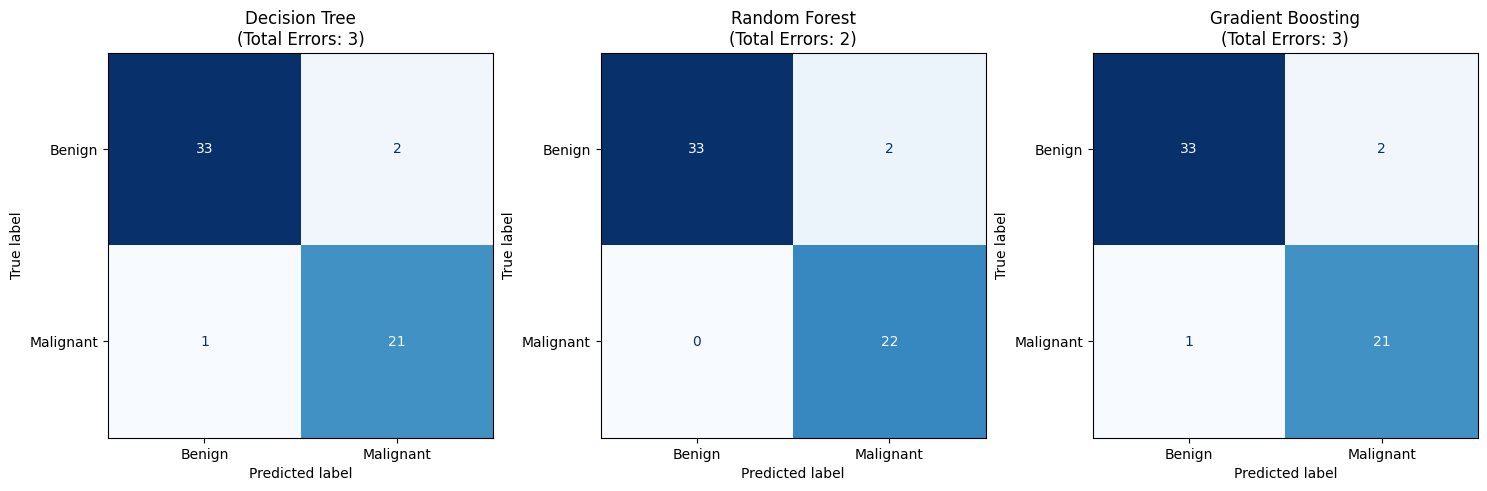

In [98]:
models = {
    "Decision Tree": tree_restrict_depth,
    "Random Forest": random_forest,
    "Gradient Boosting": gradient_boosting
}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get first fold only
train_idx, test_idx = next(skf.split(X, Y))
X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
y_train_fold, y_test_fold = Y.iloc[train_idx], Y.iloc[test_idx]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
i = 0
for name, model in models.items():
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    
    cm = confusion_matrix(y_test_fold, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    total_errors = cm[0,1] + cm[1,0]

    axes[i].set_title(f"{name}\n(Total Errors: {total_errors})")
    i+=1
plt.show()

In [99]:
# print t-test results
def perform_ttest(model_a, model_b, scores_a, scores_b):
    # ttest_rel checks if the difference between paired samples is significant
    t_stat, p_val = ttest_rel(scores_a, scores_b)
    
    print(f"{model_a} vs {model_b}:")
    print(f"   t-statistic: {t_stat:.4f}")
    print(f"   p-value:     {p_val:.4f}")
    if p_val < 0.05:
        print("   RESULT: Significant Difference")
    else:
        print("   RESULT: NO Significant Difference")
print("Paired T-Test")
scores = {}
for name, model in models.items():
    scores[name] = cross_val_score(model, X, Y, cv=skf, scoring='f1')

perform_ttest("Random Forest", "Decision Tree", scores["Random Forest"], scores["Decision Tree"])
perform_ttest("Gradient Boosting", "Decision Tree", scores["Gradient Boosting"], scores["Decision Tree"])
perform_ttest("Random Forest", "Gradient Boosting", scores["Random Forest"], scores["Gradient Boosting"])

Paired T-Test
Random Forest vs Decision Tree:
   t-statistic: 2.3538
   p-value:     0.0430
   RESULT: Significant Difference
Gradient Boosting vs Decision Tree:
   t-statistic: 1.3020
   p-value:     0.2253
   RESULT: NO Significant Difference
Random Forest vs Gradient Boosting:
   t-statistic: 1.4274
   p-value:     0.1872
   RESULT: NO Significant Difference


#### Bias–Variance Trade-off

##### Decision Tree (min_samples_leaf=10)

* The constraint limits the depth compared to an unrestricted decision tree, which reduces the model complexity. Therefore the model exhibits lower variance and higher bias.

##### Random Forest (Bagging)

* Bagging significantly reduces variance by averaging many high-variance base learners. The model exhibits much lower variance and moderate bias compared to a single decision tree. Therefore it achieves a better bias–variance balance.

##### Gradient Boosting

* Boosting focuses on correcting the errors of the previous ensemble which allows the model to learn more complex patterns in the data. This leads to lower bias than before but also higher variance. Therefore, Gradient Boosting may be more prone to overfitting compared to Random Forest.